In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

In [2]:
data=pd.read_csv('data.csv',error_bad_lines=False)
data.head()

C:\Users\janha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [3]:
#basic data exploration and cleaning

In [4]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

In [5]:
data['strength'].value_counts()

1    496801
0     89702
2     83137
Name: strength, dtype: int64

In [6]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [7]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [8]:
data.dropna(inplace=True)

In [9]:
data.isna().sum()

password    0
strength    0
dtype: int64

C:\Users\janha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


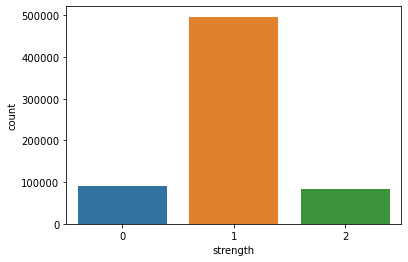

In [10]:
sns.countplot(data['strength'])
plt.show()

In [11]:
#creating tuple out of dataframe

In [12]:
import numpy as np
password_tuple = np.array(data)

In [13]:
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [14]:
#creating independent and dependent features from password tuple

In [15]:
import random
random.shuffle(password_tuple)

In [16]:
password_tuple

array([['kzde5577', 1],
       ['kzde5577', 1],
       ['kzde5577', 1],
       ...,
       ['99annkb', 0],
       ['djsdq1ny9', 1],
       ['WESTONDIGTL.COM77', 2]], dtype=object)

In [17]:
x=[labels[0] for labels in password_tuple]

In [18]:
y=[labels[1] for labels in password_tuple]

In [19]:
x[0:5]

['kzde5577', 'kzde5577', 'kzde5577', 'kzde5577', 'kzde5577']

In [20]:
y[0:5]

[1, 1, 1, 1, 1]

In [21]:
#creating method to divide data word into characters

In [22]:
def word_divide(inputs):
    my_char=[]
    for i in inputs:
        my_char.append(i)
    return my_char

In [23]:
word_divide(x[0])

['k', 'z', 'd', 'e', '5', '5', '7', '7']

In [24]:
#fitting tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
tfidf=TfidfVectorizer(tokenizer=word_divide)

In [30]:
X=tfidf.fit_transform(x)

In [34]:
X.shape

(669639, 121)

In [37]:
tfidf.get_feature_names()

['\x05',
 '\x08',
 '\x0f',
 '\x10',
 '\x11',
 '\x12',
 '\x16',
 '\x17',
 '\x1b',
 '\x1c',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\x81',
 '¡',
 '¦',
 '¨',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '·',
 'º',
 '»',
 '¾',
 '¿',
 'ß',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'ç',
 'ê',
 'í',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 '÷',
 'ù',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 'œ',
 '—',
 '‚',
 '‹',
 '›']

In [40]:
first_document_vector=X[0]
first_document_vector

<1x121 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [45]:
first_document_vector.shape

(1, 121)

In [43]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56736089],
        [0.        ],
        [0.59175289],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [46]:
first_document_vector.T.todense().shape

(121, 1)

In [49]:
df=pd.DataFrame(first_document_vector.T.todense(),index=tfidf.get_feature_names(),columns=['TF-IDF'])
df

,TF-IDF
,0.0
,0.0
,0.0
,0.0
,0.0
...,...
œ,0.0
—,0.0
‚,0.0
‹,0.0


In [52]:
df.sort_values(by=['TF-IDF'],ascending=False,inplace=True)

In [53]:
df

,TF-IDF
7,0.591753
5,0.567361
z,0.335492
k,0.292026
d,0.285184
...,...
<,0.000000
;,0.000000
9,0.000000
8,0.000000


In [ ]:
#building logistic regression model and predicting values

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
lr=LogisticRegression(multi_class='multinomial')

In [64]:
lr.fit(x_train,y_train)

C:\Users\janha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [65]:
new_pwd=np.array(['@12jh8'])

In [67]:
new_pwd_vectorized=tfidf.transform(new_pwd)

In [68]:
lr.predict(new_pwd_vectorized)

array([1])